In [1]:
# Import libraries
import pandas as pd
import mlxtend
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [2]:
# csv source:
# https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

obesity = pd.read_csv("obesity.csv")
obesity.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [3]:
# Split the data into predictor variables and an outcome variable
X = obesity.drop(["NObeyesdad"], axis=1) # Keep all columns (features) except the y variable
y = obesity.NObeyesdad

In [4]:
# Create a logistic regression model
lr = LogisticRegression(max_iter=1000)

In [5]:
# Fit the logistic regression model
lr.fit(X, y)

LogisticRegression(max_iter=1000)

In [6]:
print('Logistic Regression Model score (all features): {}'.format(lr.score(X,y)))

Logistic Regression Model score (all features): 0.7659876835622927


In [7]:
# Create a sequential forward selection (type of wrapper selection) model
sfs = SFS(lr, k_features=7, forward=True, floating=False, scoring='accuracy', cv=0)

In [8]:
# Fit the sequential forward selection model to X and y
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(7, 7), scoring='accuracy')

In [9]:
# Inspect the results of sequential forward selection
print(sfs.subsets_[7])

{'feature_idx': (0, 1, 2, 3, 6, 9, 10), 'cv_scores': array([0.78209379]), 'avg_score': 0.7820937944102321, 'feature_names': ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')}


In [10]:
# See which features sequential forward selection chose
print('Chosen features: {}'.format(sfs.subsets_[7]['feature_names']))

# Print the model accuracy after doing sequential forward selection
print('Logistic Regression Model score (after Sequential Forward Selection): {}'.format(sfs.subsets_[7]['avg_score']))

Chosen features: ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')
Logistic Regression Model score (after Sequential Forward Selection): 0.7820937944102321


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


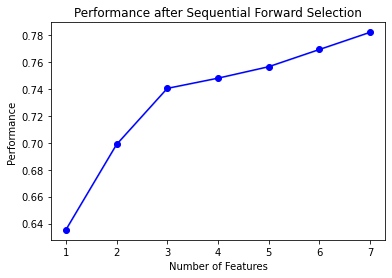

In [11]:
# Plot the model accuracy as a function of the number of features used
plot_sfs(sfs.get_metric_dict())
plt.title('Performance after Sequential Forward Selection')
plt.show()

In [12]:
# Create a sequential backward selection model
sbs = SFS(lr, k_features=7, forward=False, floating=False, scoring='accuracy', cv=0)

In [13]:
# Fit the sequential backward selection model to X and y
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(7, 7), scoring='accuracy')

In [14]:
# See which features sequential forward selection chose
print('Chosen features (SBS): {}'.format(sbs.subsets_[7]['feature_names']))

# Print the model accuracy after doing sequential forward selection
print('Logistic Regression Model score (after Sequential Backward Selection): {}'.format(sbs.subsets_[7]['avg_score']))

Chosen features (SBS): ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')
Logistic Regression Model score (after Sequential Backward Selection): 0.7820937944102321


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


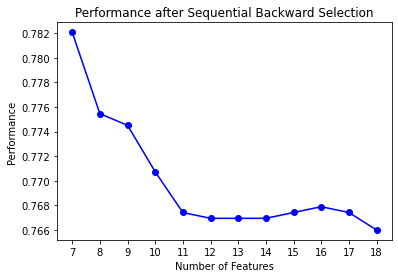

In [15]:
# Plot the model accuracy as a function of the number of features used
plot_sfs(sbs.get_metric_dict())
plt.title('Performance after Sequential Backward Selection')
plt.show()

In [16]:
# Get feature names
features = X.columns

In [17]:
# Standardize the data
X = pd.DataFrame(StandardScaler().fit_transform(X))

In [18]:
# Create a recursive feature elimination model
rfe = RFE(estimator=lr, n_features_to_select=8)

In [19]:
# Fit the recursive feature elimination model to X and y
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=8)

In [20]:
# See which features recursive feature elimination chose
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
print('Chosen features (recursion): {}'.format(rfe_features))

Chosen features (recursion): ['Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Automobile', 'Walking']


In [21]:
# Print the model accuracy after doing sequential forward selection
print('Logistic Regression Model score (after Recursion): {}'.format(rfe.score(X, y)))

Logistic Regression Model score (after Recursion): 0.7678825201326386
